# Model of the Electric Potential to Cause Curtains in the Bounce Loss Cone

Here I explore the minimum electric field (potential) necessary to lower the mirror point of an electron from 100 km in the SAA (barely) trapped, to AC6's altitude in the bounce loss cone. 

We assume that the electron's mirror point $B$ is increased due to a parallel electric field at the magnetic equator.

We will first pick a curtain observation and use IRBEM to find out the strength of the electric field necessary to lower the mirror point altitude to AC6's altitude for that observation.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.interpolate #.interp1d

import IRBEM
Re_km = 6_371

In [3]:
t_0 = datetime(2015, 8, 27, 23, 4, 44, 500000)

### Load catalog file to look up AC6 location

In [4]:
cat_path = '/home/mike/research/ac6_curtains/data/catalogs/AC6_curtains_sorted_v8.txt'
cat = pd.read_csv(cat_path, index_col=0)
cat.index = pd.to_datetime(cat.index)
cat.head()

,dos1rate,peak_std,Lm_OPQ,MLT_OPQ,lat,lon,alt,Dist_In_Track,Lag_In_Track,Dist_Total,Loss_Cone_Type,flag,AE,time_cc,space_cc,time_spatial_A,time_spatial_B,peak_width_A,peak_width_B
dateTime,,,,,,,,,,,,,,,,,,,
2014-12-19 11:45:30.500000,290.002,2.840199,6.66789,10.71360,62.7607,-35.6930,662.260,461.176,61.2438,461.422,0.0,4.0,51.0,0.094868,0.870388,2014-12-19 11:44:29.256200,2014-12-19 11:45:30.500000,NaN,0.618749
2014-12-19 18:17:11.099999,340.002,14.832431,7.24842,7.98180,63.5059,-134.1340,663.739,463.721,61.5946,463.972,1.0,0.0,405.0,0.288474,0.892241,2014-12-19 18:16:09.505399,2014-12-19 18:17:11.099999,NaN,0.553333
2014-12-19 18:17:12.300000,340.002,11.704743,7.27972,7.97519,63.5759,-134.1890,663.824,463.718,61.5946,463.968,1.0,0.0,405.0,0.090012,0.895632,2014-12-19 18:16:10.705400,2014-12-19 18:17:12.300000,NaN,0.486890
2014-12-19 21:33:52.899999,640.003,14.352735,6.97210,7.45659,70.3503,170.0450,670.690,464.995,61.7903,465.247,1.0,20.0,99.0,0.536131,0.841011,2014-12-19 21:33:52.899999,2014-12-19 21:34:54.690299,0.565442,0.957143
2015-03-26 07:31:44.500000,170.001,1.455209,7.08831,10.39770,69.2889,21.2179,632.797,243.682,32.2168,243.716,1.0,0.0,201.0,0.261325,0.888005,2015-03-26 07:31:12.283200,2015-03-26 07:31:44.500000,0.057192,0.620818


In [93]:
curtain_obs_params = cat.loc[t_0]
curtain_obs_params

dos1rate                             890.005
peak_std                             8.37401
Lm_OPQ                               3.83808
MLT_OPQ                             0.411383
lat                                  59.3801
lon                                  2.14165
alt                                  685.152
Dist_In_Track                        45.3006
Lag_In_Track                         6.03549
Dist_Total                            45.322
Loss_Cone_Type                             2
flag                                       0
AE                                       745
time_cc                             0.547989
space_cc                            0.852933
time_spatial_A    2015-08-27 23:04:38.464510
time_spatial_B    2015-08-27 23:04:44.500000
peak_width_A                             NaN
peak_width_B                        0.243307
Name: 2015-08-27 23:04:44.500000, dtype: object

### Southern Hemisphere Mirror Point For Locally Mirroring Electrons at AC6 

In [6]:
model = IRBEM.MagFields(kext='OPQ77')
X = {'dateTime':t_0, 'x1':cat.loc[t_0, 'alt'], 'x2':cat.loc[t_0, 'lat'], 'x3':cat.loc[t_0, 'lon']}

try:
    model.mirror_point_altitude(X, None)
    print(model.mirrorAlt)
except ValueError as err: 
    if str(err) == 'Mirror point below the ground!':
        print(err)
    else:
        raise

Mirror point below the ground!


Looks like the mirror point in the southern hemisphere is below the ground - these electrons were totally lost.

### Mirror points for trapped particles
Calculate the field line and find the altitude above AC6 where the last trapped partice is to be expected - defined by a 100 km mirror point altitude in the SAA

In [77]:
output_dictionary = model.trace_field_line(X, None)
output_dictionary['POSIT']; output_dictionary['blocal']
field_line = {'x':output_dictionary['POSIT'][:,0], 'y':output_dictionary['POSIT'][:,1], 
              'z':output_dictionary['POSIT'][:,2], 'blocal':output_dictionary['blocal'],
             'alt':Re_km*(np.linalg.norm(output_dictionary['POSIT'], axis=1)-1)}
df_field_line = pd.DataFrame(data=field_line)
interp_index = np.linspace(0, len(output_dictionary['POSIT'][:,0])-1, num=10000)

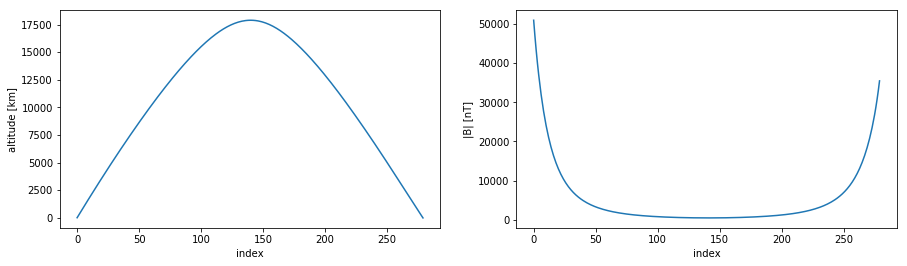

In [54]:
_ , ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(df_field_line.alt); ax[0].set(xlabel='index', ylabel='altitude [km]')
ax[1].plot(df_field_line.blocal); ax[1].set(xlabel='index', ylabel='|B| [nT]');

Interpolate the field line values

In [78]:
def interp_df(df, new_index):
    """
    Return a new DataFrame with all columns values interpolated
    to the new_index values.
    """
    df_out = pd.DataFrame(index=new_index)
    df_out.index.name = df.index.name

    for colname, col in df.iteritems():
        df_out[colname] = np.interp(new_index, df.index, col, right=np.nan)

    return df_out

field_line_interp = interp_df(df_field_line, interp_index)

Find the magnetic field strength at 100 km in the southern hemisphere

In [88]:
southern_mp_trapped = field_line_interp[field_line_interp.alt > 100].iloc[-1]
southern_mp_trapped

x             0.455764
y             0.309929
z            -0.853187
blocal    33716.817123
alt         100.354565
Name: 278.3024302430243, dtype: float64

Now find what altitude in the northern hemisphere has the same magnetic field strength

In [92]:
northern_mp_trapped = field_line_interp[field_line_interp.blocal < southern_mp_trapped.blocal].iloc[0]
northern_mp_trapped

x             0.603544
y             0.023170
z             0.982677
blocal    33654.932946
alt         977.715098
Name: 5.3294329432943295, dtype: float64

In [107]:
ac6_blocal = field_line_interp[field_line_interp.alt > curtain_obs_params.alt].iloc[0].blocal
print(f"The electron's mirror point must have decreased by at least "
      f"{round(northern_mp_trapped.alt - curtain_obs_params.alt)} km "
      f"into a {round(ac6_blocal - northern_mp_trapped.blocal)} nT stronger field strength")

The electron's mirror point must have decreased by at least 293.0 km into a 4283.0 nT stronger field strength


# Misc

### 35 keV electron bounce period in the area
Calculate the bounce period for locally mirroring, 35 keV electrons near the BLC region. This is only an appriximation to see if the bounce period is anywhere near the 4-8 second AC6 in-track separations when these curtains were observed.

In [ ]:
X = {'dateTime':t_0, 'x1':cat.loc[t_0, 'alt'], 'x2':cat.loc[t_0, 'lat'], 'x3':-30}
model.bounce_period(X, None, 35)
print(f'35 keV electron bounce period is {round(model.Tb, 2)} seconds')